In [39]:
import tensorflow as tf
print("yess" if tf.config.list_physical_devices('GPU') else "noo")

yess


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#!unzip "/content/drive/MyDrive/dog-breed-identification.zip" -d "/content/drive/MyDrive/DogVision"

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv("/content/drive/MyDrive/DogVision/labels.csv")
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [44]:
labels = [label for label in df['breed']]
filenames = ["/content/drive/MyDrive/DogVision/train/"+id+".jpg" for id in df["id"]]
labels[:5], filenames[:5]

(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
 ['/content/drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  '/content/drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  '/content/drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
  '/content/drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
  '/content/drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg'])

In [45]:
len(labels), len(filenames)

(10222, 10222)

In [46]:
unique_breeds = np.unique(labels)
print(len(unique_breeds), unique_breeds)

120 ['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'ita

In [47]:
bool_labels = [unique_breeds == label for label in labels]
print(len(bool_labels),bool_labels[:5])

10222 [array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False]), array([False, False, False, False, False, False, Fals

Reading files using "Image" from IPython

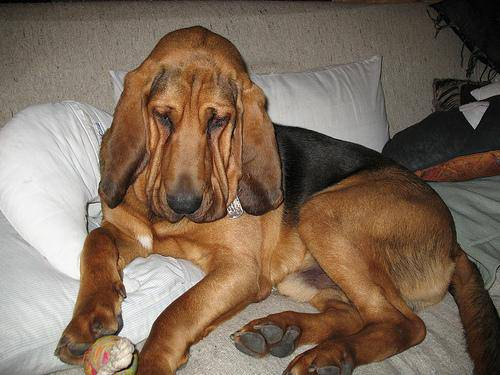

In [48]:
from IPython.display import Image
Image(filenames[69])

In [49]:
print(labels[69], np.argmax(bool_labels[69]), bool_labels[69])

bloodhound 14 [False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


Reading files using "ImShow" from matplotlib

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
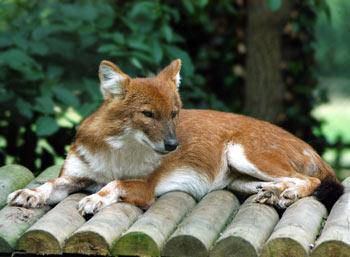

In [57]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image

**Preprocessing the image**
1. read the image (output: tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00......)
2. decode the image, i.e: convert to numbers format (output: tf.Tensor(
[[[107  45   0]
  [151  91  41]
  [177 119  69]
  ...))

3. convert to float and normalize-divide by 225 in this case, (output: tf.Tensor
[[[0.41960788 0.1764706  0.        ]
  [0.5921569  0.35686275 0.16078432]
  [0.69411767 0.4666667  0.27058825]
  ...)

4. and lastly resize the image to 224,224 (output: tf.Tensor(
[[[0.5705322  0.33588538 0.15008473]
  [0.66901225 0.4601166  0.26022965]
  [0.61062384 0.43763596 0.21601713]
  ...
  ))

In [82]:
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.image.resize(image, size=[224,224])
  return image

In [83]:
def process_with_label(image_paths, label):
  image = process_image(image_path=image_paths)
  return image, label

**Now we create a function to convert this to batch**

In [84]:
BATCH_SIZE = 32
def create_batch(x, y=None, batch_size=BATCH_SIZE, test_data=False, val_data=False):
  """
  x = fileNames of the data
  y = corresponding label for the file
  if it is test or val data set either one to True, if not leave it be for train data
  """
  if test_data:
    print(f"Creating test batches of size {BATCH_SIZE}")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data = data.map(process_image)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

  elif val_data:
    print(f"Creating validation data batches of size {BATCH_SIZE}")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data = data.map(process_with_label)
    data_batch = data.batch(batch_size=BATCH_SIZE)
    return data_batch

  else:
    print(f"Creating training data batches of size {BATCH_SIZE}")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data = data.shuffle(buffer_size=len(x), seed=42)
    data = data.map(process_with_label)
    data_batch = data.batch(batch_size=BATCH_SIZE)
  return data_batch

**We First try to train the model on 1000 images because if any mistakes occur, debugging for smaller data is easy than trying to write code and debug for larger data**

In [96]:
X_1000 = filenames[:1000]
y_1000 = bool_labels[:1000]
len(X_1000), len(y_1000)

(1000, 1000)

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_1000, y_1000, test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [98]:
train_batch = create_batch(x_train, y_train)
val_batch = create_batch(x_val, y_val, val_data=True)
print(train_batch.element_spec)
print(val_batch)

Creating training data batches of size 32
Creating validation data batches of size 32
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>
